# Analyzing Covid-19 Cases and Vaccine Data Across Texas Counties

## Python Project for SDS 348
## Ashley Gilliam (akg2479)

### Introduction

In this project, I will be using Python to analyze data from my first two projects. The dataset, txcoviddata, is a combination of two separate datasets consisting of Covid-19 cases and fatalities in counties across Texas as well as vaccination data. I joined and tidied the two datasets into txcoviddata in my first project and will now perform EDA on the dataset in Python. I will first need to pull my dataset from Github.

In [9]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
#call txcoviddata dataset from Github
url = 'https://raw.githubusercontent.com/AshleyKG/myrepo/main/Project%202/Project-2_files/figure-gfm/txcoviddata.csv'
txcoviddata = pd.read_csv(url, error_bad_lines=False)
#view dataset
print(txcoviddata)

         county  confirmed_cases  probable_cases  fatalities  doses_allocated  \
0      Anderson             4809            1268         110             9800   
1       Andrews             1701               0          46             3300   
2      Angelina             4697            3339         265            28300   
3       Aransas              879             277          35             2300   
4        Archer              678             101          12             1600   
5     Armstrong              107              42           6             1100   
6      Atascosa             4086            1357         141             8100   
7        Austin             1593             310          32             3900   
8        Bailey              585             217          17            14545   
9       Bandera              922             368          26             1300   
10      Bastrop             6615            1950          84            21400   
11       Baylor             

In [8]:
#get dataset info
txcoviddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 13 columns):
county                       254 non-null object
confirmed_cases              254 non-null int64
probable_cases               254 non-null int64
fatalities                   254 non-null int64
doses_allocated              254 non-null int64
doses_administered           254 non-null int64
pop_one_plus_doses           254 non-null int64
pop_fully_vaccinated         254 non-null int64
pop_1a                       254 non-null int64
pop_1b                       254 non-null int64
pop_elligible                254 non-null int64
prop_elligible_vaccinated    254 non-null float64
case_level                   254 non-null object
dtypes: float64(1), int64(10), object(2)
memory usage: 25.9+ KB


There are 254 rows and observations, indicative of the 254 counties in Texas. There are also 13 variables: county, confirmed and probably Covid-19 cases, fatalities, the total number of Covid-19 vaccine doses allocated and administered, the populations of those that have received one or more vaccine doses, the total eligible populations under Phases 1a, 1b, and overall, and then the proportion of those eligible that have been vaccinated as well as case level. Case level is a variable I created to group counties based on how many confirmed Covid-19 cases they have. Counties with over 10,000 confirmed Covid-19 cases are placed in the "high" case level group, those with less than 1000 confirmed Covid-19 cases are in the "low" case level group, and anything in between is in the "medium" case level.

### Exploratory Data Analysis

In [19]:
# Summary statistics for confirmed cases and doses allocated by case level
(txcoviddata.filter(['confirmed_cases', 'doses_allocated', 'case_level'])
.groupby(['case_level'])
.agg(['mean'])
.head(3))

,confirmed_cases,doses_allocated
,mean,mean
case_level,,
high,56244.314286,213158.000000
low,404.241071,2027.366071
med,2956.915888,10787.149533


The average number of confirmed cases is 56,244.31 for counties in the high case level group, 2,956.92 cases for counties in the medium case level group, and 404.24 cases for counties in the low case level group. The mean number of vaccine doses allocated is 213,158 doses for the high case level group, 10,787.15 doses in the medium case level group, and 2,027.37 doses for those in the low case level group.

In [25]:
# More summary statistics for confirmed cases and doses allocated
(txcoviddata.filter(['confirmed_cases', 'doses_allocated'])
.agg(['min', 'max'])
.head(2))

,confirmed_cases,doses_allocated
min,1,0
max,360421,1423180


The lowest number of confirmed cases in a county is 1 confirmed case, while the highest number of confirmed cases is 360,421 cases. The minimum number of vaccine doses allocated is 0 while the highest is 1,423,180 doses.

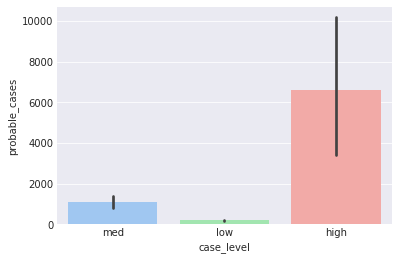

In [35]:
#visualize mean probable cases across case level
sns.set_style("darkgrid")
bar_plot = sns.barplot(x=txcoviddata["case_level"],y=txcoviddata["probable_cases"],
                        palette="pastel")

The average number of probable cases in counties from the high case level group is around 6,500 cases. The average number of probable cases in the medium case level group is around 1,000 cases. The low case level group has an average number of probable cases of about 500 cases.